<a href="https://colab.research.google.com/github/salianbharat/BE_DS_Assignment/blob/main/AdaBoost_25March.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This assignment aims to utilize the AdaBoost algorithm to analyze given Brain Stroke Dataset.**

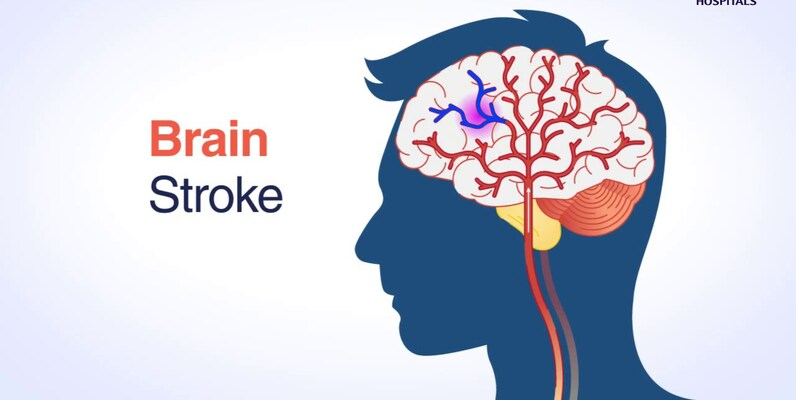

**This is Recent Adaboost Assignment given on 25th March
**
Dataset is downloaded from Kaggle. More Information of Data is as below-

A stroke is a medical condition in which poor blood flow to the brain causes cell death. There are two main types of stroke: ischemic, due to lack of blood flow, and hemorrhagic, due to bleeding. Both cause parts of the brain to stop functioning properly. Signs and symptoms of a stroke may include an inability to move or feel on one side of the body, problems understanding or speaking, dizziness, or loss of vision to one side. Signs and symptoms often appear soon after the stroke has occurred. If symptoms last less than one or two hours, the stroke is a transient ischemic attack (TIA), also called a mini-stroke. A hemorrhagic stroke may also be associated with a severe headache. The symptoms of a stroke can be permanent. Long-term complications may include pneumonia and loss of bladder control.

lets import the required libraries

In [1]:
# Pandas for data manipulation and analysis
import pandas as pd

# Matplotlib and Seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Train test split for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# LabelEncoder for encoding categorical variables
from sklearn.preprocessing import LabelEncoder

# AdaBoostClassifier for implementing AdaBoost algorithm
from sklearn.ensemble import AdaBoostClassifier

# Metrics for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score




Load the dataset (BS)

In [2]:
BS = pd.read_csv("/content/drive/MyDrive/Dataset/brain_stroke.csv")
BS

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


**Attribute Information**
1) gender: "Male", "Female" or "Other"

2) age: age of the patient

3) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

4) heart disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease 5) Ever-married: "No" or "Yes"

6) work type: "children", "Govtjov", "Never worked", "Private" or "Self-employed"

7) Residencetype: "Rural" or "Urban"

8) avg glucose level: average glucose level in blood

9) BMI: body mass index

10) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

11) stroke: 1 if the patient had a stroke or 0 if not

<Axes: xlabel='stroke', ylabel='count'>

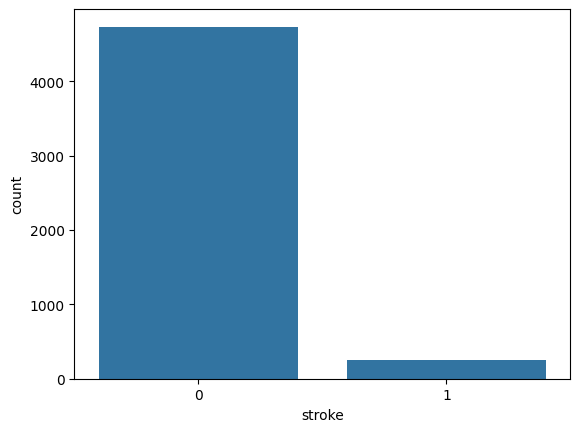

In [10]:
sns.countplot(data=BS, x='stroke')


<Axes: xlabel='heart_disease', ylabel='count'>

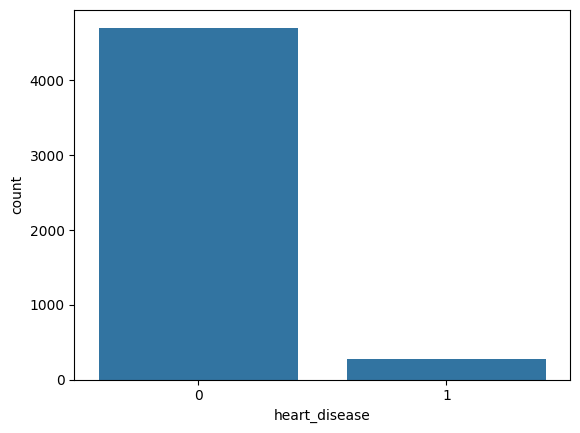

In [4]:
sns.countplot(data=BS,x='heart_disease')

In [ ]:
#Doing preanalysis steps

BS.shape

(4981, 11)

In [7]:
print("\n Stastical summary of the Dataset is as below -")
print( BS.describe().T)


 Stastical summary of the Dataset is as below -
                    count        mean        std    min    25%    50%     75%  \
age                4981.0   43.419859  22.662755   0.08  25.00  45.00   61.00   
hypertension       4981.0    0.096165   0.294848   0.00   0.00   0.00    0.00   
heart_disease      4981.0    0.055210   0.228412   0.00   0.00   0.00    0.00   
avg_glucose_level  4981.0  105.943562  45.075373  55.12  77.23  91.85  113.86   
bmi                4981.0   28.498173   6.790464  14.00  23.70  28.10   32.60   
stroke             4981.0    0.049789   0.217531   0.00   0.00   0.00    0.00   

                      max  
age                 82.00  
hypertension         1.00  
heart_disease        1.00  
avg_glucose_level  271.74  
bmi                 48.90  
stroke               1.00  


In [5]:
BS.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4981.0,43.419859,22.662755,0.08,25.00,45.00,61.00,82.00
hypertension,4981.0,0.096165,0.294848,0.00,0.00,0.00,0.00,1.00
heart_disease,4981.0,0.055210,0.228412,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,4981.0,105.943562,45.075373,55.12,77.23,91.85,113.86,271.74
bmi,4981.0,28.498173,6.790464,14.00,23.70,28.10,32.60,48.90
stroke,4981.0,0.049789,0.217531,0.00,0.00,0.00,0.00,1.00


In [17]:
BS.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [18]:
print(" This dataset is consists of below columns-",BS.columns)

 This dataset is consists of below columns- Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


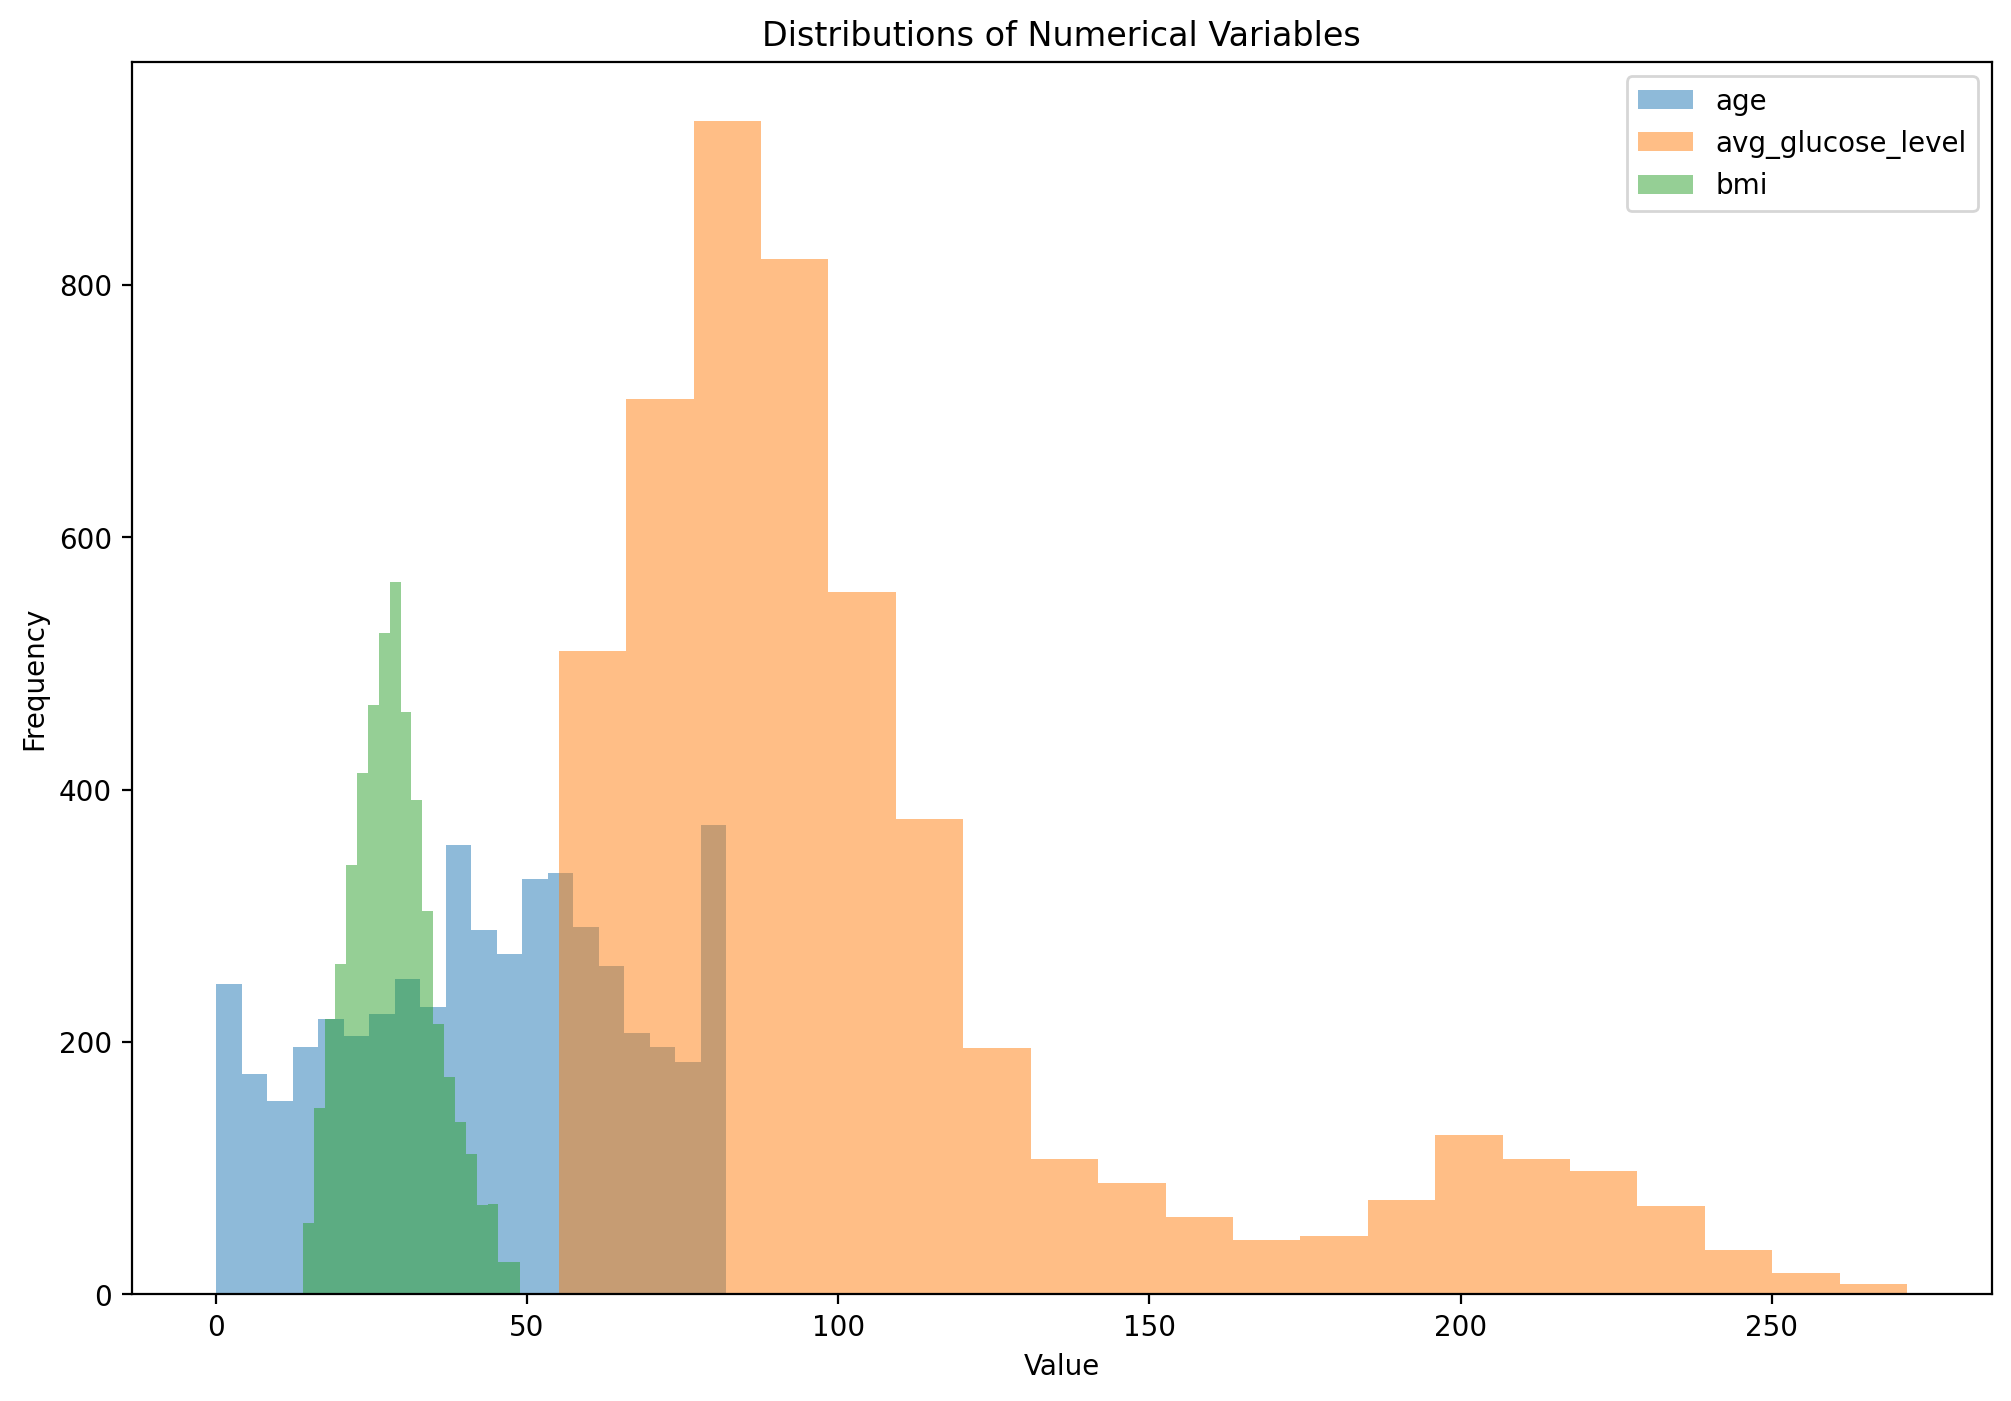

In [19]:
# Visualize distributions of numerical variables using histograms
plt.figure(figsize=(12, 8), dpi = 200)

# Iterate through each numerical column and plot its histogram
for column in ['age', 'avg_glucose_level', 'bmi']:
    plt.hist(BS[column], bins=20, alpha=0.5, label=column)

# Add labels and title
plt.title('Distributions of Numerical Variables')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Show plot
plt.show()


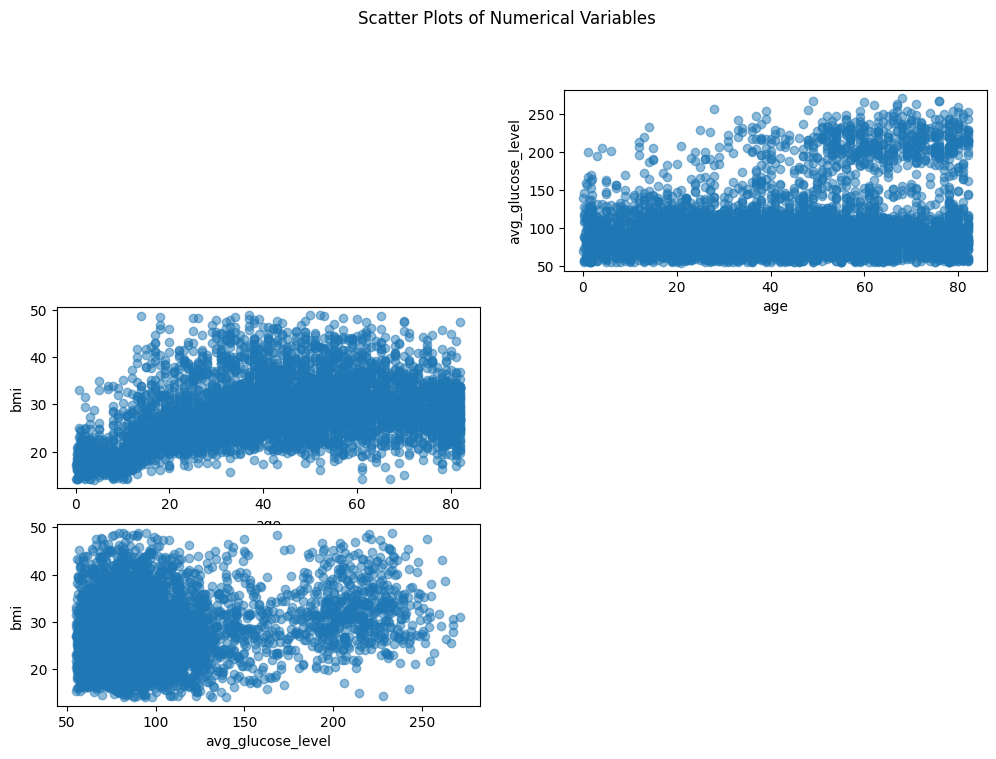

In [20]:
# Visualize relationships between numerical variables using scatter plots
plt.figure(figsize=(12, 8))

# Iterate through pairs of numerical columns and plot scatter plots
for i, column1 in enumerate(['age', 'avg_glucose_level', 'bmi']):
    for j, column2 in enumerate(['age', 'avg_glucose_level', 'bmi']):
        if i < j:
            plt.subplot(3, 2, i*2 + j + 1)
            plt.scatter(BS[column1], BS[column2], alpha=0.5)
            plt.xlabel(column1)
            plt.ylabel(column2)

# Add title
plt.suptitle('Scatter Plots of Numerical Variables')

# Adjust layout
#plt.tight_layout()

# Show plot
plt.show()


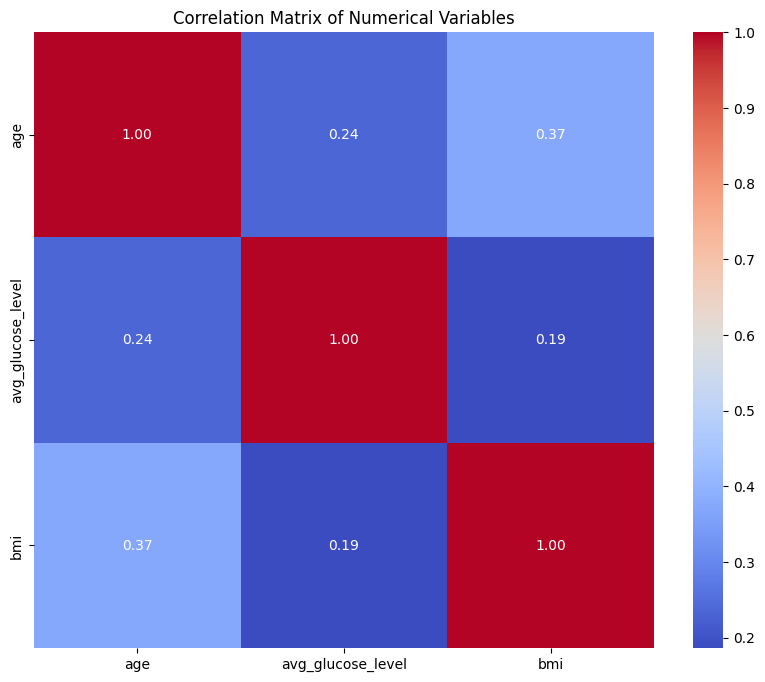

In [21]:
# Visualize correlations between numerical variables using a heatmap
plt.figure(figsize=(10, 8))

# Compute the correlation matrix
correlation_matrix = BS[['age', 'avg_glucose_level', 'bmi']].corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title and show plot
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


In [22]:
from sklearn.preprocessing import OneHotEncoder

# Assume BS contains the dataset

# Perform one-hot encoding for categorical variables
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_cols = pd.DataFrame(encoder.fit_transform(BS[categorical_cols]))
encoded_cols.columns = encoder.get_feature_names_out(categorical_cols)

# Combine the encoded categorical columns with numerical columns
X = pd.concat([BS.drop(columns=categorical_cols), encoded_cols], axis=1)

# Target variable (y)
y = BS['stroke']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (3984, 15)
Shape of X_test: (997, 15)
Shape of y_train: (3984,)
Shape of y_test: (997,)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [23]:
# Check for missing values in the original dataset before encoding
missing_values_before = BS.isnull().sum()
print("Missing values before encoding:")
print(missing_values_before)

# Handle missing values (if any)
# For demonstration, let's impute missing numerical values with the mean
# and missing categorical values with the mode (most frequent value)
BS.fillna(BS.mean(), inplace=True)  # Impute missing numerical values with mean
BS.fillna(BS.mode().iloc[0], inplace=True)  # Impute missing categorical values with mode

# Check again for missing values after handling
missing_values_after = BS.isnull().sum()
print("\nMissing values after handling:")
print(missing_values_after)


Missing values before encoding:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Missing values after handling:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


<ipython-input-23-46ff3dfd0bee>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  BS.fillna(BS.mean(), inplace=True)  # Impute missing numerical values with mean


**Modelling**

In [24]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=1)
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

**Evalutionbold text**

In [26]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
predictions = model.predict(X_test)

In [27]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       943
           1       1.00      1.00      1.00        54

    accuracy                           1.00       997
   macro avg       1.00      1.00      1.00       997
weighted avg       1.00      1.00      1.00       997



In [29]:
model.feature_importances_

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [30]:
len(X.columns)

15